In [108]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from collections import defaultdict
from sklearn.utils import resample
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
import usefulFunctions as useful
import eval_functions as metrics
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
fileName = "Master_PL.xlsx - Master_PL.csv"
normalized_table = pd.read_csv(fileName, header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

In [110]:
def make_binary(x):
    return x-1

def make_boolean(x):
    if x:
        return bool(x)
    else:
        return bool(x)
def standardize(x, mean, std):
    return (x - mean)/std

def support(column):
    counts = defaultdict(int)
    
    for value in column:
        counts[value]+=1
    
    for key in counts:
        counts[key] = counts[key]/float(len(column))
    
    return counts

In [111]:
normalized_table.type = normalized_table.type.apply(make_binary)
normalized_table.gender = normalized_table.gender.apply(make_binary)

In [112]:
normalized_table = normalized_table[(normalized_table.protein_BL > 5) & (normalized_table.protein_V4 > 5) & (normalized_table.protein_V6 > 5) & 
             (normalized_table.protein_V8 > 5)]

len(normalized_table)
normalized_table.type.value_counts()

1    190
0     84
Name: type, dtype: int64

In [113]:
df_majority = normalized_table[normalized_table.type==1]
df_minority = normalized_table[normalized_table.type==0]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.type.value_counts()

1    190
0    190
Name: type, dtype: int64

In [114]:
print(df_upsampled[df_upsampled.protein_BL > 5].type.value_counts())
print(df_upsampled[df_upsampled.protein_V4 > 5].type.value_counts())
print(df_upsampled[df_upsampled.protein_V6 > 5].type.value_counts())
print(df_upsampled[df_upsampled.protein_V8 > 5].type.value_counts())
print(df_upsampled[df_upsampled.protein_V10 > 5].type.value_counts())
print(df_upsampled[df_upsampled.protein_V12 > 5].type.value_counts())

1    190
0    190
Name: type, dtype: int64
1    190
0    190
Name: type, dtype: int64
1    190
0    190
Name: type, dtype: int64
1    190
0    190
Name: type, dtype: int64
0    127
1    120
Name: type, dtype: int64
0    84
1    47
Name: type, dtype: int64


In [153]:
X = df_upsampled[['age','gender', 'protein_BL', 'protein_V4', 'protein_V6', 'protein_V8']].as_matrix()
y = df_upsampled[['type']].as_matrix()
y = np.squeeze(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=5)

In [160]:
tree_clf = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=1)
forest = RandomForestClassifier(n_estimators=30, random_state=1)
tree_clf.fit(X_train, y_train)
clf = tree_clf
# forest.fit(X_train, y_train)
# clf= forest

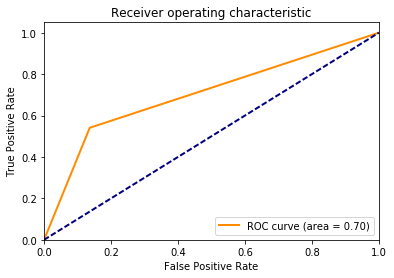

In [161]:
roc_info = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_info = auc(roc_info[0], roc_info[1])
useful.createROCGraph(roc_info[0], roc_info[1], auc_info)

Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.46  0.54]]


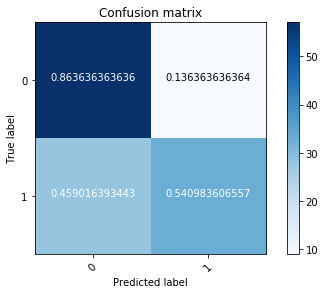

In [162]:
cm = confusion_matrix(y_test, clf.predict(X_test))
useful.plot_confusion_matrix(cm, ["0", "1"])

In [163]:
y_test, clf.predict(X_test)

(array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]),
 array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]))

In [164]:
scores = cross_val_score(clf, X, y, cv=10)
print("Cross Fold Mean: %.3f, Cross Fold Stdev: %.3f" % (np.mean(scores), np.std(scores)))

Cross Fold Mean: 0.800, Cross Fold Stdev: 0.067


In [165]:
metrics_dict = metrics.get_all_metrics(y_test, clf.predict(X_test))
print(metrics.pretty_print_metrics(metrics_dict))

accuracy: 0.709

precision: 
	all: ['0.671', '0.786']
	micro: 0.709
	macro: 0.728
	weighted: 0.726
	
recall: 
	all: ['0.864', '0.541']
	micro: 0.709
	macro: 0.702
	weighted: 0.709
	
f1_measure: 
	all: ['0.755', '0.641']
	micro: 0.709
	macro: 0.698
	weighted: 0.700
	
support: 
	y_true_dist: ['0.520', '0.480']
	y_true_count: 127.000
	y_predicted_dist: ['0.669', '0.331']
	y_predicted_count: 127.000
	



In [166]:
clf.feature_importances_

array([ 0.2 ,  0.07,  0.23,  0.21,  0.1 ,  0.2 ])

In [167]:
import graphviz

In [168]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                         feature_names=['age', 'gender', 'protein_BL', 'protein_V4', 'protein_V6', 'protein_V8'],  
                         class_names=["not_affected", "affected"],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data, format='pdf')
graph.render()

'Source.gv.pdf'

In [58]:
age_std = np.std(df_upsampled.age)

bl_std = np.std(df_upsampled.protein_BL)

v4_std = np.std(df_upsampled.protein_V4)

v6_std = np.std(df_upsampled.protein_V6)

v8_std = np.std(df_upsampled.protein_V8)

[age_std, bl_std, v4_std, v6_std, v8_std]

[10.361131220393119,
 15.731422574983069,
 24.963613102976993,
 40.909819459215356,
 17.214833106310277]

In [59]:
clf.feature_importances_

array([ 0.14,  0.06,  0.21,  0.29,  0.13,  0.16])

In [130]:
def average_stats(clf, X, y):
    stats = {}
    
    accuracy = []
    
    precision = {
        "all" : [],
        "micro" : [],
        "macro" : [],
        "weighted" : []
    }
    
    recall = {
        "all" : [],
        "micro" : [],
        "macro" : [],
        "weighted" : []
    }
    
    f1_measure = {
        "all" : [],
        "micro" : [],
        "macro" : [],
        "weighted" : []
    }
    
    conf_matrix = {
        "top_left" : [],
        "top_right" : [],
        "bottom_left" : [],
        "bottom_right" : []
    }
    
    feature_importances = [[] for x in X[0]]
    
    for i in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=i**2)
        clf.fit(X_train, y_train)
        metrics_dict = metrics.get_all_metrics(y_test, clf.predict(X_test))
        accuracy.append(metrics_dict["accuracy"])
        for key in metrics_dict["precision"]:
            precision[key].append(metrics_dict["precision"][key])
        for key in metrics_dict["recall"]:
            recall[key].append(metrics_dict["recall"][key])
        for key in metrics_dict["f1_measure"]:
            f1_measure[key].append(metrics_dict["f1_measure"][key])

        conf_matrix["top_left"].append(metrics_dict["confusion_matrix"][0][0])
        conf_matrix["top_right"].append(metrics_dict["confusion_matrix"][0][1])
        conf_matrix["bottom_left"].append(metrics_dict["confusion_matrix"][1][0])
        conf_matrix["bottom_right"].append(metrics_dict["confusion_matrix"][1][1])
        
        for i, entry in enumerate(clf.feature_importances_):
            feature_importances[i].append(entry)
            
    stats["mean_accuracy"] = np.mean(accuracy)
    stats["median_accuracy"] = np.median(accuracy)
    
    stats["mean_precision"] = {}
    stats["median_precision"] = {}
    for key in precision:
        if key == "all":
            class_zero = [x[0] for x in precision[key]]
            class_one = [x[1] for x in precision[key]]
            stats["mean_precision"][key] = [np.mean(class_zero), np.mean(class_one)]
            stats["median_precision"][key] = [np.median(class_zero), np.median(class_one)]
        else:
            stats["mean_precision"][key] = np.mean(precision[key])
            stats["median_precision"][key] = np.median(precision[key])
    
    stats["mean_recall"] = {}
    stats["median_recall"] = {}
    for key in recall:
        if key == "all":
            class_zero = [x[0] for x in recall[key]]
            class_one = [x[1] for x in recall[key]]
            stats["mean_recall"][key] = [np.mean(class_zero), np.mean(class_one)]
            stats["median_recall"][key] = [np.median(class_zero), np.median(class_one)]
        else:
            stats["mean_recall"][key] = np.mean(recall[key])
            stats["median_recall"][key] = np.median(recall[key])
    
    stats["mean_f1_measure"] = {}
    stats["median_f1_measure"] = {}
    for key in f1_measure:
        if key == "all":
            class_zero = [x[0] for x in f1_measure[key]]
            class_one = [x[1] for x in f1_measure[key]]
            stats["mean_f1_measure"][key] = [np.mean(class_zero), np.mean(class_one)]
            stats["median_f1_measure"][key] = [np.median(class_zero), np.median(class_one)]
        else:
            stats["mean_f1_measure"][key] = np.mean(f1_measure[key])
            stats["median_f1_measure"][key] = np.median(f1_measure[key])
#     print(conf_matrix)
    stats["mean_confusion_matrix"] = [[np.mean(conf_matrix["top_left"]), np.mean(conf_matrix["top_right"])],
                                      [np.mean(conf_matrix["bottom_left"]), np.mean(conf_matrix["bottom_right"])]]
    
    stats["median_confusion_matrix"] = [[np.median(conf_matrix["top_left"]), np.median(conf_matrix["top_right"])],
                                      [np.median(conf_matrix["bottom_left"]), np.median(conf_matrix["bottom_right"])]]
    
    stats["mean_feature_importances"] = [np.mean(arr) for arr in feature_importances]
    stats["median_feature_importances"] = [np.median(arr) for arr in feature_importances]
    
    return stats

In [131]:
min_samples = 1
tree_clf = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=1)
forest = RandomForestClassifier(n_estimators=30, random_state=1, min_samples_leaf=min_samples)

average_stats(forest, X, y)

{'mean_accuracy': 0.76456692913385815,
 'mean_confusion_matrix': [[0.838023275304704, 0.16197672469529606],
  [0.30908480952164868, 0.69091519047835137]],
 'mean_f1_measure': {'all': [0.78238084328073698, 0.74110548889784544],
  'macro': 0.76174316608929116,
  'micro': 0.76456692913385815,
  'weighted': 0.76294544637293205},
 'mean_feature_importances': [0.17983212912984162,
  0.038302505796577145,
  0.20295454596529952,
  0.20221665342975911,
  0.18436318987697611,
  0.19233097580154659],
 'mean_precision': {'all': [0.73731354526061244, 0.80612829210265669],
  'macro': 0.77172091868163439,
  'micro': 0.76456692913385815,
  'weighted': 0.7740336305212685},
 'mean_recall': {'all': [0.838023275304704, 0.69091519047835137],
  'macro': 0.76446923289152768,
  'micro': 0.76456692913385815,
  'weighted': 0.76456692913385815},
 'median_accuracy': 0.76377952755905509,
 'median_confusion_matrix': [[0.83844313981300278, 0.16155686018699716],
  [0.30602006688963213, 0.69397993311036787]],
 'median

In [199]:
min_samples/float(len(X) * 0.667)

0.12625266314211314

In [158]:
f1_min_samples = [("1, 0.4% of training", 0.761), ("2, 0.8% of training", 0.742), ("4, 1.6% of training", 0.715), 
                  ("8, 3.2% of training", 0.678), ("16, 6.3% of training", 0.607), ("20, 7.9% of training", 0.601)]

min_samples = ["1, 0.4% of training", "2, 0.8% of training", "4, 1.6% of training", "8, 3.2% of training", 
               "16, 6.3% of training", "20, 7.9% of training"]

f1_scores = [0.761, 0.742, 0.715, 0.678, 0.607, 0.601]
f1_scores_line = [0.761, 0.715, 0.665, 0.640, 0.601]

In [197]:
print 0.761 - 0.715
print 0.715 - 0.665
print 0.665 - 0.640
print 0.640 - 0.601
print 0.601 - 0.6

0.046
0.05
0.025
0.039
0.001


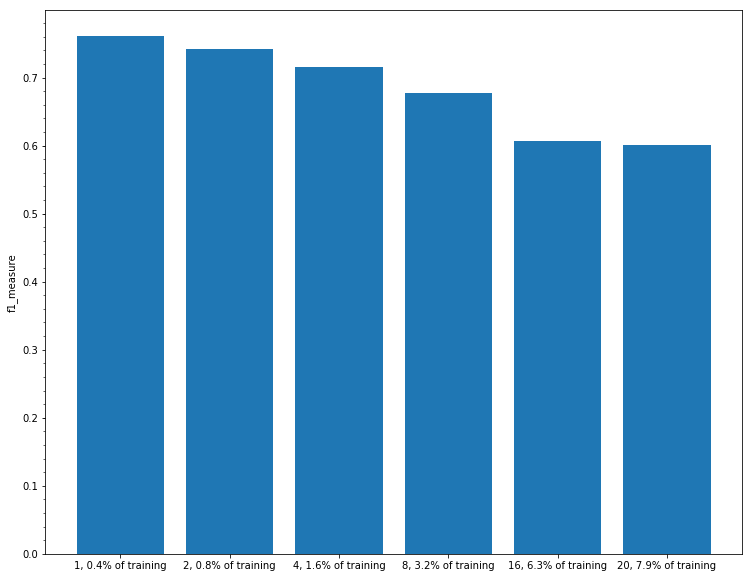

In [187]:
from matplotlib.ticker import AutoMinorLocator

minorLocator = AutoMinorLocator()
fig=plt.figure(figsize=(12.5, 10.0))
ax=fig.add_subplot(111)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.yaxis.set_minor_locator(minorLocator)
# ax.set_title("f1_measure vs min number of points in leaf")
ax.set_ylabel("f1_measure")
bar_plot = ax.bar(np.arange(0, 6), f1_scores)
ax.set_xticklabels(["","1, 0.4% of training", "2, 0.8% of training", "4, 1.6% of training", "8, 3.2% of training", 
               "16, 6.3% of training", "20, 7.9% of training"])
plt.show()




Confusion matrix, without normalization
[[ 0.84  0.16]
 [ 0.31  0.69]]


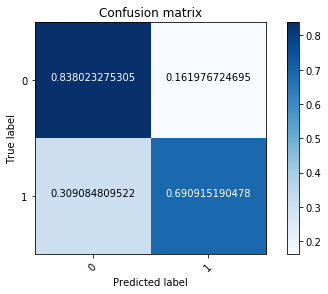

In [135]:
cm = np.array([[0.838023275304704, 0.16197672469529606],
  [0.30908480952164868, 0.69091519047835137]])
useful.plot_confusion_matrix(cm, ["0", "1"], normalize=False)